Q. The following is based on the Wisconsin Breast Cancer dataset. It is part of sklearn.datasets. It records clinical measurements of breast cancer tumors. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.

A. Create a Decision Tree to predict whether a tumor is malignant based on the measurements of the tissue.

B. Draw the scatter diagram and correlation for the given data and explain

C. Do a Principal Component Analysis (PCA) on the same data.

D. Create a decision Tree on the transformed data and subset of the transformed data.

Explain and compare the results obtained in part (A) and part (D)

In [1]:
import pandas as pd
import numpy as np
#Reading the complete data
from sklearn.datasets import load_breast_cancer 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from google.colab import files
import io
###################### Random Forest ############################
from sklearn.ensemble import RandomForestClassifier 
#use RandomForestRegressor for regression problem


In [42]:
# 1.1 Call libraries
import numpy as np
import pandas as pd

# 1.2 For OS related operations
import os
import matplotlib.pyplot as plt

# 1.3 Class for applying multiple data transformation jobs
from sklearn.compose import ColumnTransformer as ct

# 1.4 Scale numeric data
from sklearn.preprocessing import StandardScaler as ss

# 1.5 One hot encode data--Convert to dummy
from sklearn.preprocessing import LabelEncoder as le

# 1.6 for data splitting
from sklearn.model_selection import train_test_split

# 1.7 Modeler
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# User guide: https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier as dt
###################### Random Forest ############################
from sklearn.ensemble import RandomForestClassifier 
#use RandomForestRegressor for regression problem



In [4]:
uploaded= files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [32]:
#Reading the complete data
from sklearn.datasets import load_breast_cancer 

In [44]:
cancer = pd.read_csv("breast-cancer.csv")

In [45]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
#Answer problem 2  here onwards

#Storing by spliting the data and target
cancer=cancer.drop("id", axis=1)
X = cancer.drop("diagnosis", axis=1).values
y = cancer["diagnosis"]
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Feature Scaling
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
l=le()
Y_train=l.fit_transform(Y_train)
Y_test=l.transform(Y_test)

In [47]:
Y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [48]:
#Part (A) 

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

classifier = dt(criterion = 'entropy', random_state = 0)
#classifier = dt(criterion = 'entropy', random_state = 0, max_depth=4)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
#Y_pred, Y_test


In [49]:
print("Predicted Values : ",Y_pred[1:50])

Predicted Values :  [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 1 0 0 0 1]


[Text(0.5625, 0.9375, 'X[7] <= -0.006\nentropy = 0.953\nsamples = 426\nvalue = [267, 159]'),
 Text(0.325, 0.8125, 'X[20] <= 0.104\nentropy = 0.286\nsamples = 260\nvalue = [247, 13]'),
 Text(0.2, 0.6875, 'X[13] <= 0.116\nentropy = 0.143\nsamples = 246\nvalue = [241, 5]'),
 Text(0.1, 0.5625, 'X[21] <= 0.744\nentropy = 0.096\nsamples = 243\nvalue = [240, 3]'),
 Text(0.05, 0.4375, 'entropy = 0.0\nsamples = 212\nvalue = [212, 0]'),
 Text(0.15, 0.4375, 'X[23] <= -0.42\nentropy = 0.459\nsamples = 31\nvalue = [28, 3]'),
 Text(0.1, 0.3125, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.2, 0.3125, 'X[0] <= -0.2\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(0.15, 0.1875, 'X[1] <= 2.321\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1, 0.0625, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2, 0.0625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.1875, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3, 0.5625, 'X[8] <= -0.536\nentropy = 0.9

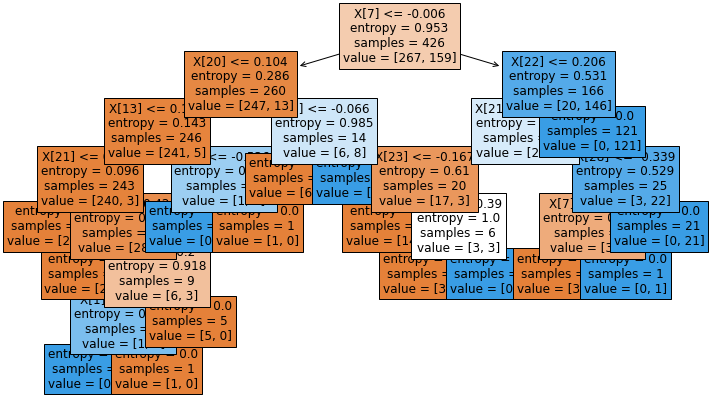

In [38]:
plt.figure(figsize=(12,7))
tree.plot_tree(classifier, filled=True, fontsize=12)
#no change

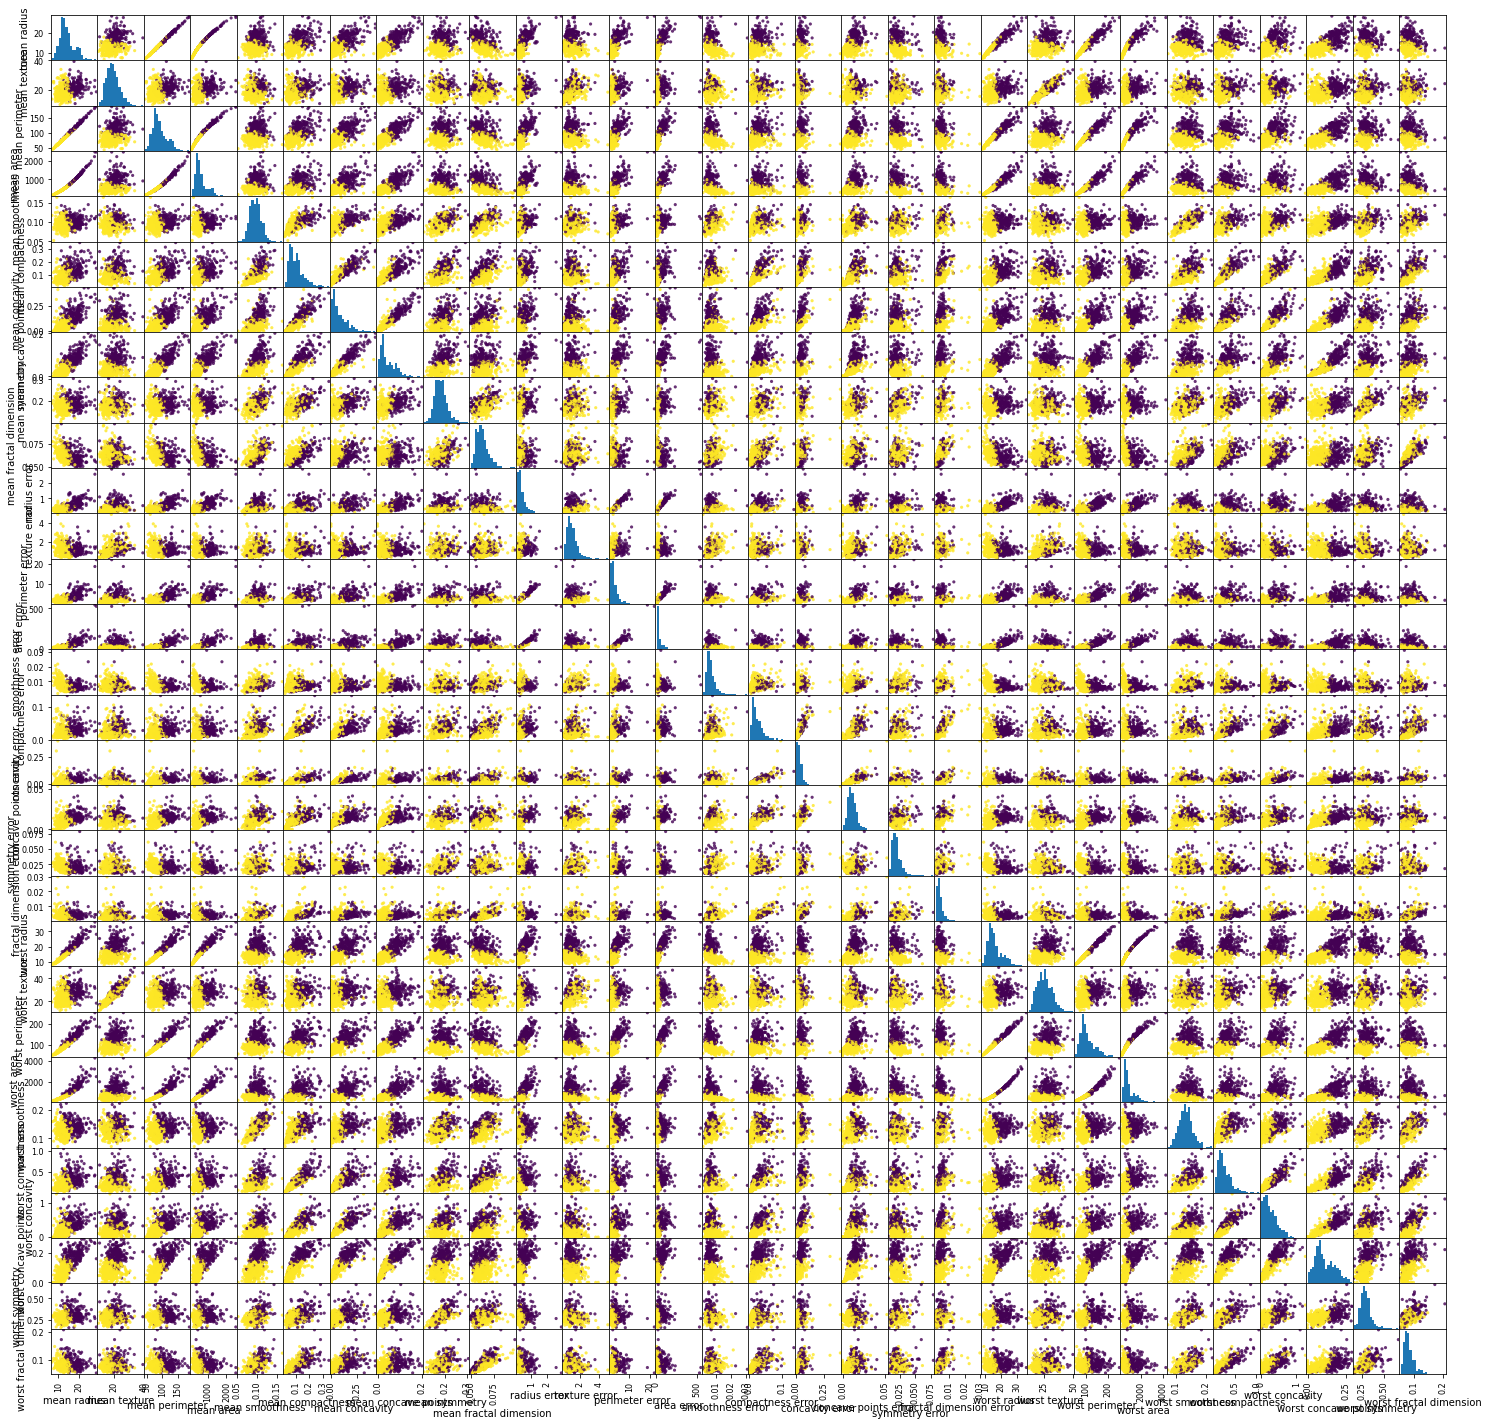

In [ ]:
#Part(B) -> Plotting the scatter diagram 

X_dataframe = data_X

grr = pd.plotting.scatter_matrix(X_dataframe, c=cancer.target, figsize=(25, 25), marker='o', hist_kwds={'bins': 20}, s=10, alpha=.8)

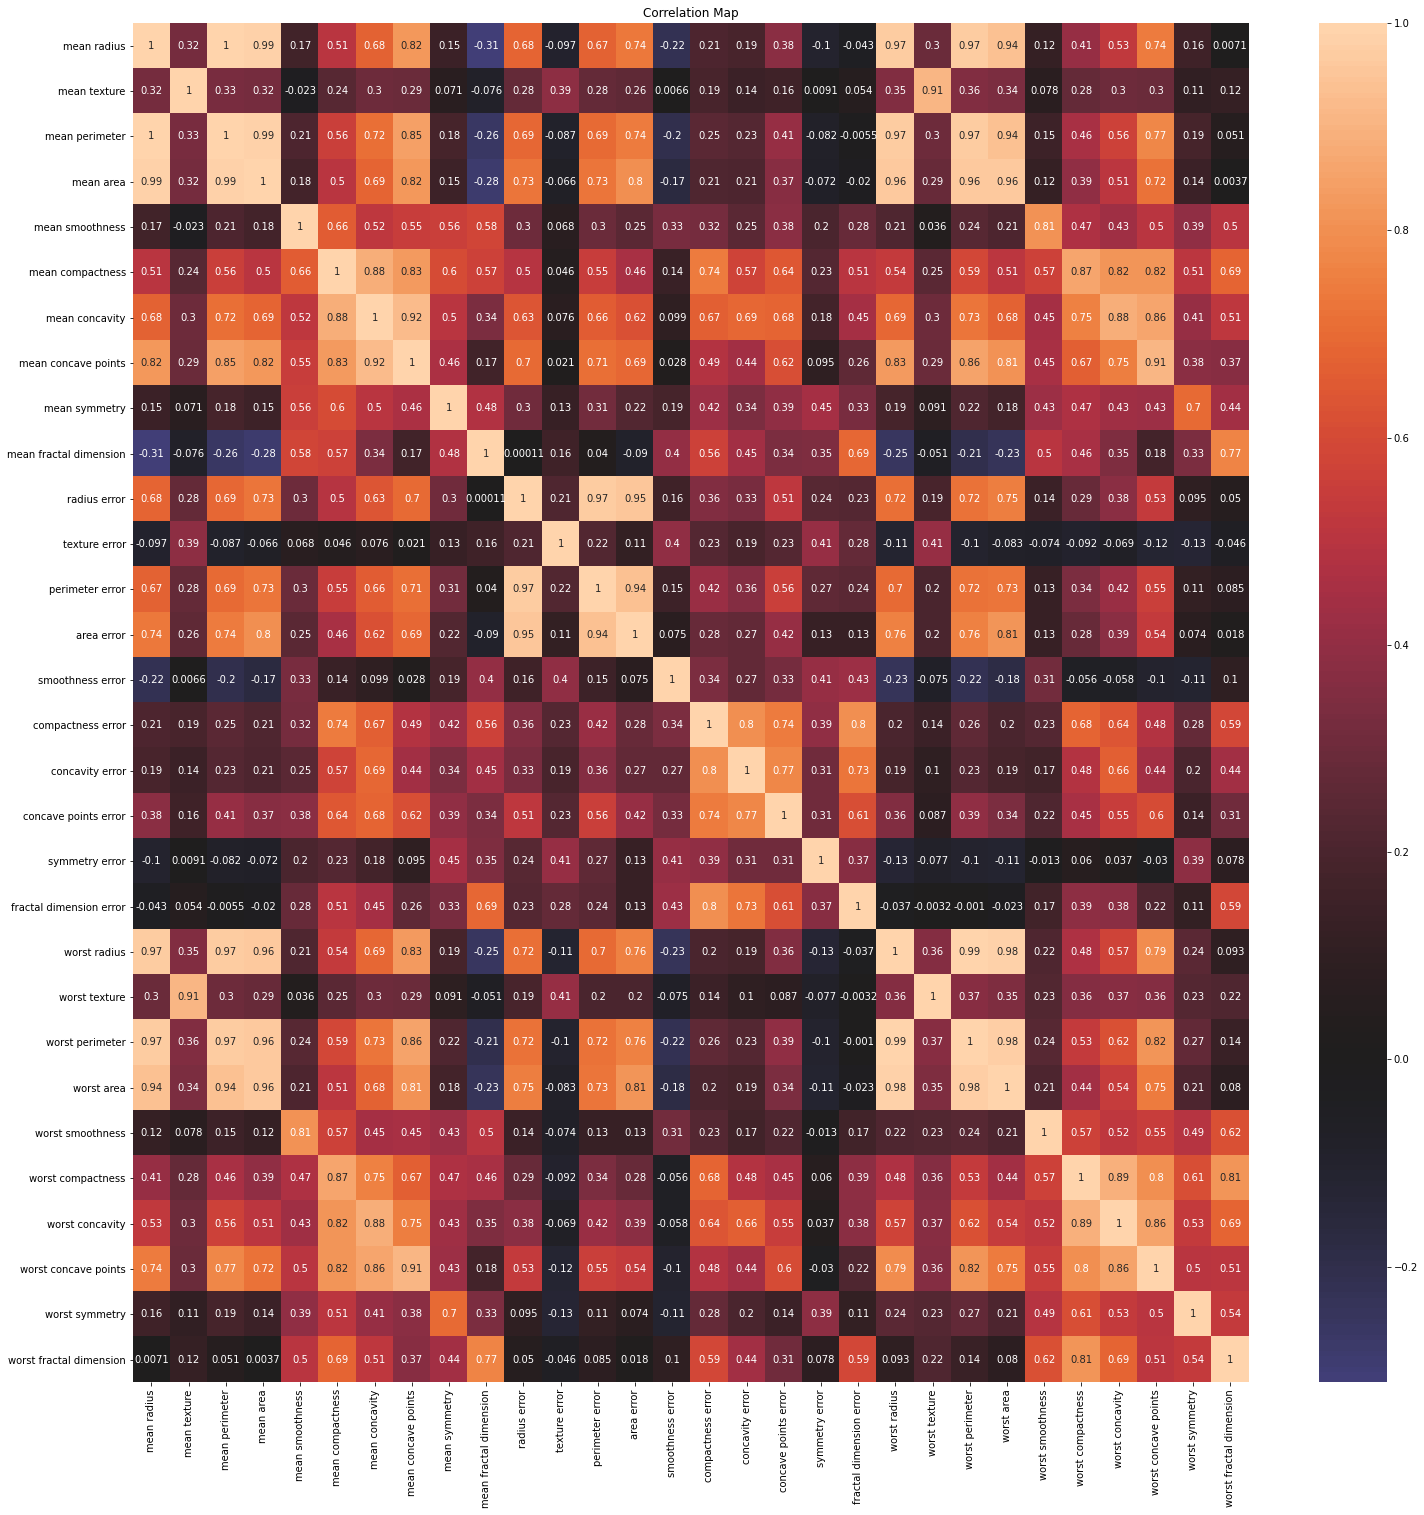

In [ ]:
#Part(B) -> Plotting the Correlation Map

import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(data_X.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [ ]:
#Part(C) -> PCA

from sklearn.decomposition import PCA
model=PCA(n_components=2)

#It finds the 2 principle componenets.
model.fit(data_X)
#reducing 30 features to 2
#Transforms the data into 2 principle components
X_PCA=model.transform(data_X)
X.shape,X_PCA.shape

((569, 30), (569, 2))

In [ ]:
#Part(D) -> Creating a Decision Tree
X_Train, X_Test, y_Train, y_Test = train_test_split(X_PCA, y, random_state=1)

classifier = dt(criterion = 'entropy', random_state = 0)
classifier.fit(X_Train, y_Train)

Y_Pred = classifier.predict(X_Test)

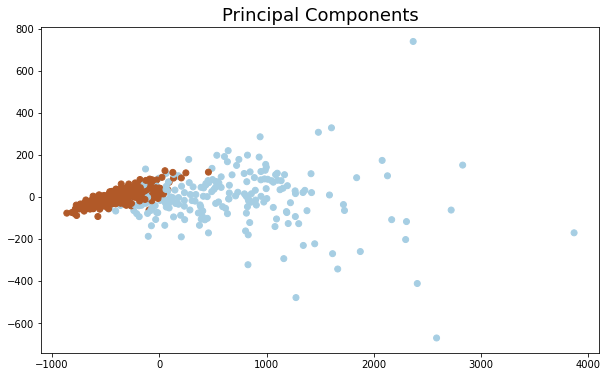

In [ ]:
#Part(D) -> Plotting a scatter diagram 
# plot first vs. second principal component, colored by class

plt.figure(figsize=(10,6))
plt.title("Principal Components", fontsize=18)
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y, cmap='Paired')

In [ ]:
#Checking model accuracy
from sklearn.metrics import accuracy_score

#accuracy on testing set before PCA
print("Accuracy testing set before PCA {}".format(accuracy_score(Y_test, Y_pred)))

print("Accuracy testing set after PCA {}".format(accuracy_score(y_Test, Y_Pred)))

Accuracy testing set before PCA 0.958041958041958
Accuracy testing set after PCA 0.9300699300699301
